## Spectra generation

In [1]:
import multirex as mrex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys 
import pandas as pd
from tqdm import tqdm
import warnings
from sklearn.exceptions import DataConversionWarning

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

%matplotlib inline
waves=np.loadtxt("waves.txt")
n_points = len(waves)

In [2]:
import ast
# Función para convertir string a lista
def string_to_list(string):
    return ast.literal_eval(string)


CH4_data = pd.read_csv("spec_data/CH4_data.csv")
CH4_data["label"] = CH4_data["label"].apply(string_to_list)
CH4_data["label"] = CH4_data["label"].apply(lambda x: x[0])
CH4_data.data = CH4_data.iloc[:,-n_points:]
CH4_data.params = CH4_data.iloc[:,:-n_points]

CO2_data = pd.read_csv("spec_data/CO2_data.csv")
CO2_data["label"] = CO2_data["label"].apply(string_to_list)
CO2_data["label"] = CO2_data["label"].apply(lambda x: x[0])
CO2_data.data = CO2_data.iloc[:,-n_points:]
CO2_data.params = CO2_data.iloc[:,:-n_points]

O3_data = pd.read_csv("spec_data/O3_data.csv")
O3_data["label"] = O3_data["label"].apply(string_to_list)
O3_data["label"] = O3_data["label"].apply(lambda x: x[0])
O3_data.data = O3_data.iloc[:,-n_points:]
O3_data.params = O3_data.iloc[:,:-n_points]

H2O_data = pd.read_csv("spec_data/H2O_data.csv")
H2O_data["label"] = H2O_data["label"].apply(string_to_list)
H2O_data["label"] = H2O_data["label"].apply(lambda x: x[0])
H2O_data.data = H2O_data.iloc[:,-n_points:]
H2O_data.params = H2O_data.iloc[:,:-n_points]

CH4_O3_data=pd.read_csv("spec_data/CH4_O3_data.csv")
CH4_O3_data["label"] = CH4_O3_data["label"].apply(string_to_list)
CH4_O3_data["label"]=CH4_O3_data["label"].apply(lambda x: x[0])
CH4_O3_data.data=CH4_O3_data.iloc[:,-n_points:]
CH4_O3_data.params=CH4_O3_data.iloc[:,:-n_points]

CH4_H2O_data=pd.read_csv("spec_data/CH4_H2O_data.csv")
CH4_H2O_data["label"] = CH4_H2O_data["label"].apply(string_to_list)
CH4_H2O_data["label"]=CH4_H2O_data["label"].apply(lambda x: x[0])
O3_H2O_data=pd.read_csv("spec_data/O3_H2O_data.csv")
CH4_H2O_data.data=CH4_H2O_data.iloc[:,-n_points:]
CH4_H2O_data.params=CH4_H2O_data.iloc[:,:-n_points]

O3_H2O_data["label"] = O3_H2O_data["label"].apply(string_to_list)
O3_H2O_data["label"]=O3_H2O_data["label"].apply(lambda x: x[0])
O3_H2O_data.data=O3_H2O_data.iloc[:,-n_points:]
O3_H2O_data.params=O3_H2O_data.iloc[:,:-n_points]

CH4_O3_H2O_data=pd.read_csv("spec_data/CH4_O3_H2O_data.csv")
CH4_O3_H2O_data["label"] = CH4_O3_H2O_data["label"].apply(string_to_list)
CH4_O3_H2O_data["label"]=CH4_O3_H2O_data["label"].apply(lambda x: x[0])
CH4_O3_H2O_data.data=CH4_O3_H2O_data.iloc[:,-n_points:]
CH4_O3_H2O_data.params=CH4_O3_H2O_data.iloc[:,:-n_points]

C:\Users\santi\AppData\Local\Temp\ipykernel_20988\721523088.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CH4_data.data = CH4_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_20988\721523088.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CH4_data.params = CH4_data.iloc[:,:-n_points]
C:\Users\santi\AppData\Local\Temp\ipykernel_20988\721523088.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CO2_data.data = CO2_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_20988\721523088.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.p

In [3]:
CO2_data.iloc[:,-n_points:]

,5.297569,5.290111,5.28264,5.275158,5.267664,5.260158,5.252641,5.245111,5.237568,5.230015,...,0.764875,0.756764,0.748855,0.741148,0.733644,0.726317,0.71918,0.712225,0.705435,0.698805
0,0.005016,0.005017,0.005022,0.005028,0.005037,0.005037,0.005040,0.005038,0.005043,0.005044,...,0.005024,0.005025,0.005025,0.005026,0.005026,0.005027,0.005027,0.005027,0.005028,0.005028
1,0.005042,0.005039,0.005043,0.005054,0.005062,0.005058,0.005060,0.005058,0.005061,0.005060,...,0.005029,0.005030,0.005030,0.005031,0.005032,0.005032,0.005033,0.005033,0.005034,0.005035
2,0.005072,0.005068,0.005069,0.005087,0.005095,0.005083,0.005085,0.005091,0.005084,0.005083,...,0.005034,0.005035,0.005036,0.005037,0.005038,0.005039,0.005040,0.005040,0.005041,0.005042


In [4]:
# Función para normalizar por filas con Min-Max, con manejo de casos especiales
def normalize_min_max_by_row(df):
    min_by_row = df.min(axis=1)
    max_by_row = df.max(axis=1)
    range_by_row = max_by_row - min_by_row
    # Evitar división por cero asignando NaN, que luego reemplazaremos
    normalized = (df.sub(min_by_row, axis=0)).div(range_by_row, axis=0)
    # Manejar filas donde max == min (rango es cero), puedes ajustar este valor
    normalized[range_by_row == 0] = 0  # O cualquier otro valor que consideres apropiado
    return normalized


def plot_confusion_matrix(y_test, y_pred, labels, display_labels, title):
    """
    Función para calcular y mostrar la matriz de confusión con etiquetas descriptivas y un título personalizado.

    Parámetros:
    - y_test: Array con los valores reales.
    - y_pred: Array con las predicciones del modelo.
    - labels: Lista de las etiquetas de clase en el orden en que deben ser tratadas.
    - display_labels: Lista con los nombres descriptivos para las etiquetas de las clases para visualización.
    - title: String con el título para el gráfico de la matriz de confusión.
    """

    # Calcula la matriz de confusión con las etiquetas descriptivas
    cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')

    # Crea el display de la matriz de confusión con etiquetas descriptivas
    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=display_labels)
    disp.plot(values_format=".0%", colorbar=True, ax=ax)
    disp.im_.colorbar.remove()
    disp.im_.set_clim(0, 1)

    # Crea manualmente la barra de colores con los límites correctos
    cbar = fig.colorbar(disp.im_, ax=ax)
    cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))  # Corrige el formateador para mostrar en porcentajes

    plt.subplots_adjust(left=0.1, right=0.9, 
                        top=0.9, bottom=0.1)
    plt.title(title, fontsize=20)

    plt.show()
    
def remove_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)    

mix_ratios = np.logspace(-10,-1,10)


## SNR =1



In [5]:
SNR1_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                   n_repeat=10000,
                                   SNR=1)

SNR1_CH4 = mrex.generate_df_SNR_noise(df=CH4_data,
                                      n_repeat=500,
                                      SNR=1)


In [6]:
SNR1_CO2_CH4=pd.concat([SNR1_CO2,SNR1_CH4],ignore_index=True)
SNR1_CO2_CH4["label"].value_counts()

label
0    30000
1    15000
Name: count, dtype: int64

## SNR =3



In [7]:
SNR3_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                   n_repeat=10000,
                                   SNR=3)

SNR3_CH4 = mrex.generate_df_SNR_noise(df=CH4_data,
                                      n_repeat=1000,
                                      SNR=3)


In [8]:
SNR3_CO2_CH4=pd.concat([SNR3_CO2,SNR3_CH4],ignore_index=True)
SNR3_CO2_CH4["label"].value_counts()


label
0    30000
1    30000
Name: count, dtype: int64

## SNR= 6



In [9]:
SNR6_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                      n_repeat=10000,
                                      SNR=6)

SNR6_CH4 = mrex.generate_df_SNR_noise(df=CH4_data,
                                     n_repeat=500,
                                     SNR=6)

SNR6_CO2_CH4=pd.concat([SNR6_CO2,SNR6_CH4],ignore_index=True)

SNR6_CO2_CH4["label"].value_counts()


label
0    30000
1    15000
Name: count, dtype: int64

## SNR=10

In [10]:

SNR10_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=10)
SNR10_CH4 = mrex.generate_df_SNR_noise(df=CH4_data,
                                        n_repeat=500,
                                        SNR=10)

SNR10_CO2_CH4=pd.concat([SNR10_CO2,SNR10_CH4],ignore_index=True)

SNR10_CO2_CH4["label"].value_counts()



label
0    30000
1    15000
Name: count, dtype: int64

## SNR=20


In [11]:
SNR20_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=20)

SNR20_CH4 = mrex.generate_df_SNR_noise(df=CH4_data,
                                        n_repeat=500,
                                        SNR=20)

SNR20_CO2_CH4=pd.concat([SNR20_CO2,SNR20_CH4],ignore_index=True)

SNR20_CO2_CH4["label"].value_counts()



label
0    30000
1    15000
Name: count, dtype: int64

## No Noise

In [12]:
SNRnan_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=1e4)

SNRnan_CH4 = mrex.generate_df_SNR_noise(df=CH4_data,
                                        n_repeat=1000,
                                        SNR=1e4)

SNRnan_CO2_CH4=pd.concat([SNRnan_CO2,SNRnan_CH4],ignore_index=True)

SNRnan_CO2_CH4["label"].value_counts()

label
0    30000
1    30000
Name: count, dtype: int64

## ALL SNR

In [13]:
SNRall = pd.concat([SNR1_CO2_CH4,SNR3_CO2_CH4,SNR6_CO2_CH4,SNR10_CO2_CH4,SNR20_CO2_CH4,SNRnan_CO2_CH4],ignore_index=True)

SNRall["label"].value_counts()

label
0    180000
1    120000
Name: count, dtype: int64

In [14]:
SNRall_train, SNRall_test = train_test_split(SNRall, test_size=0.2,)
SNRall_train.iloc[:,-n_points:]=normalize_min_max_by_row(SNRall_train.iloc[:,-n_points:])
SNRall_test.iloc[:,-n_points:]=normalize_min_max_by_row(SNRall_test.iloc[:,-n_points:])
SNRall_X_train = SNRall_train.iloc[:, -n_points:]
SNRall_y_train = SNRall_train["label"].astype(int)
SNRall_X_test = SNRall_test.iloc[:, -n_points:]
SNRall_y_test = SNRall_test["label"].astype(int)


### rf

In [22]:
SNRall_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=200,
    criterion="entropy",
    min_samples_leaf=3,
    n_jobs=-1
                            )

SNRall_rf.fit(SNRall_X_train, SNRall_y_train)

import joblib
joblib.dump(SNRall_rf, "CH4_rf.joblib")

c:\Users\santi\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

RandomForestClassifier(criterion='entropy', max_depth=200, min_samples_leaf=3,
                       n_estimators=400, n_jobs=-1)

c:\Users\santi\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


[[32100  3831]
 [ 5629 18440]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     35931
           1       0.83      0.77      0.80     24069

    accuracy                           0.84     60000
   macro avg       0.84      0.83      0.83     60000
weighted avg       0.84      0.84      0.84     60000



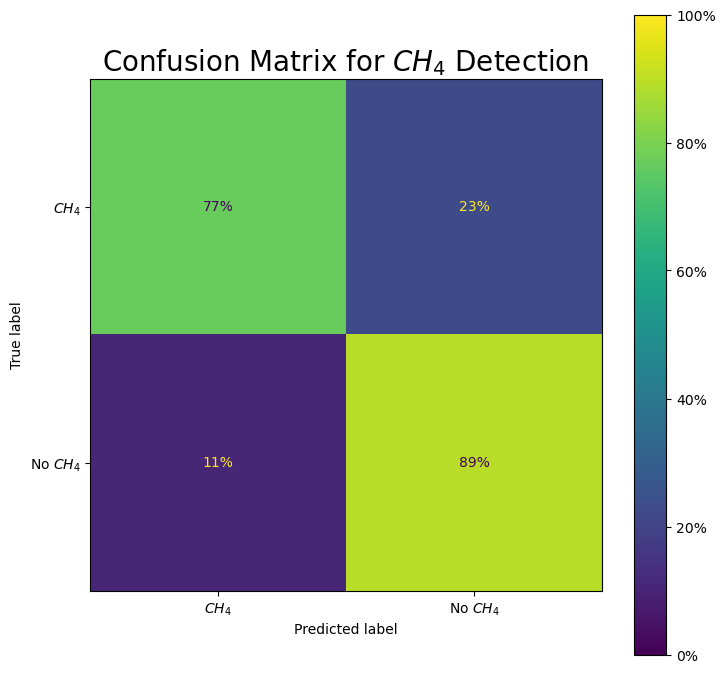

In [16]:
SNRall_probabilities = SNRall_rf.predict_proba(SNRall_X_test)[:, 1]

# Asignar etiquetas basadas en el umbral ajustado
threshold = 0.38
remove_warnings()
SNRall_y_pred = (SNRall_probabilities > threshold).astype(int)

# Asignar etiquetas y puntuaciones a las predicciones
SNRall_test["pred"] = SNRall_y_pred
SNRall_test["score"] = SNRall_probabilities

# Imprimir la matriz de confusión y el informe de clasificación
print(confusion_matrix(SNRall_y_test, SNRall_y_pred))
print(classification_report(SNRall_y_test, SNRall_y_pred))

plot_confusion_matrix(
    SNRall_y_test, SNRall_y_pred,
    labels=[1,0], display_labels=["$CH_4$", "No $CH_4$"],
    title="Confusion Matrix for $CH_4$ Detection "
)



### Validation

In [17]:
SNR = 1

SNR_val_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=SNR)
SNR_val_CH4 = mrex.generate_df_SNR_noise(df=CH4_data,
                                         n_repeat=1000,
                                         SNR=SNR)
SNR_val = pd.concat([SNR_val_CO2,SNR_val_CH4],
                    ignore_index=True)

SNR_val_test = SNR_val
SNR_val_test.iloc[:,-n_points:] = normalize_min_max_by_row(SNR_val_test.iloc[:,
                                                                             -n_points:])

#SNR_val_test= SNR_val_test[SNR_val_test["atm temperature"]==400]

SNR_val_X_test = SNR_val_test.iloc[:, -n_points:]
SNR_val_y_test = SNR_val_test["label"].astype(int)

In [18]:
SNR_val_X_test

,5.297569,5.290111,5.28264,5.275158,5.267664,5.260158,5.252641,5.245111,5.237568,5.230015,...,0.764875,0.756764,0.748855,0.741148,0.733644,0.726317,0.71918,0.712225,0.705435,0.698805
0,0.450540,0.620220,0.293703,0.263807,0.376775,0.424428,0.394757,0.295494,0.537073,0.419583,...,0.576490,0.220452,0.304040,0.447104,0.397958,0.505911,0.605810,0.443053,0.655314,0.216248
1,0.725583,0.422755,0.424854,0.578660,0.742046,0.347881,0.500497,0.456036,0.698330,0.315023,...,0.457828,0.536026,0.473599,0.473947,0.430154,0.492796,0.707821,0.459650,0.408067,0.709156
2,0.254293,0.457565,0.368779,0.759690,0.545189,0.288601,0.479920,0.542282,0.763439,0.434987,...,0.221480,0.304337,0.244419,0.505565,0.624460,0.543505,0.345200,0.584290,0.532897,0.581059
3,0.653899,0.560876,0.546578,0.624853,0.456172,0.592526,0.567106,0.152007,0.284757,0.433723,...,0.632447,0.625296,0.539768,0.174426,0.530013,0.502374,0.866232,0.549662,0.436800,0.595800
4,0.235965,0.480878,0.100357,0.382651,0.406032,0.625427,0.413199,1.000000,0.422301,0.603544,...,0.721050,0.296180,0.734744,0.349508,0.430024,0.534862,0.474962,0.425902,0.633833,0.355036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.317975,0.737089,0.479199,0.440966,0.838453,0.460963,0.648789,0.463789,0.745090,0.814810,...,0.319047,0.465066,0.608816,0.314627,0.518330,0.481836,0.478726,0.413357,0.383393,0.462652
59996,0.796936,0.522562,0.471634,0.779856,0.486583,0.617929,0.499262,0.424562,0.670914,0.568652,...,0.624496,0.585852,0.487427,0.311443,0.479389,0.422471,0.413905,0.544770,0.765135,0.445066
59997,0.443711,0.569715,0.472501,0.597460,0.530776,0.673463,0.314324,0.600134,0.189904,0.386480,...,0.666147,0.162099,0.179015,0.702157,0.380945,0.685822,0.166809,0.588482,0.414382,0.355954
59998,0.277455,0.734629,0.311230,0.617308,0.740137,0.560395,0.475010,0.368238,0.576146,0.546586,...,0.413221,0.374130,0.367540,0.541451,0.439483,0.524651,0.460562,0.418855,0.368397,0.505329


[[18440 11560]
 [ 8776 21224]]
              precision    recall  f1-score   support

           0       0.68      0.61      0.64     30000
           1       0.65      0.71      0.68     30000

    accuracy                           0.66     60000
   macro avg       0.66      0.66      0.66     60000
weighted avg       0.66      0.66      0.66     60000



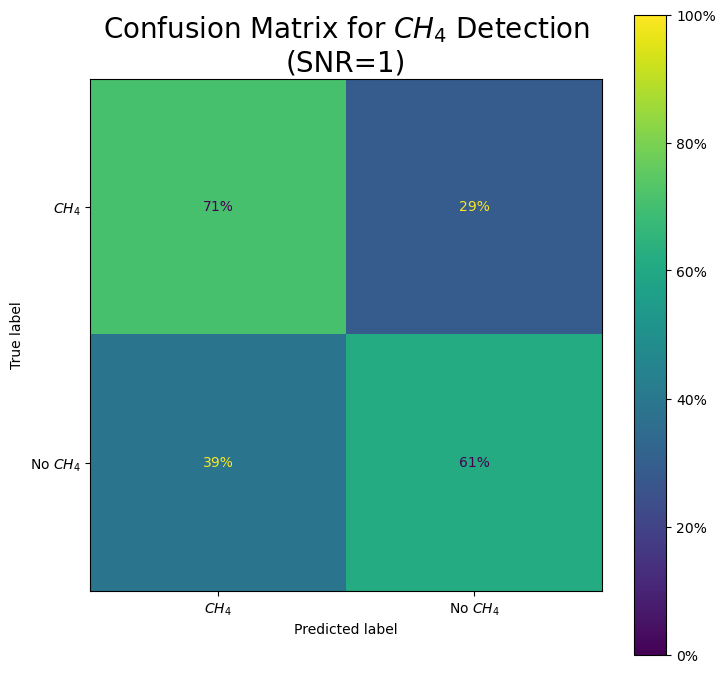

In [20]:
remove_warnings()
SNR_val_predictions = SNRall_rf.predict_proba(SNR_val_X_test)[:, 1]

threshold = 0.39
SNR_val_y_pred = (SNR_val_predictions > threshold).astype(int)
SNR_val_test["pred"] = SNR_val_y_pred
SNR_val_test["score"] = SNR_val_predictions


print(confusion_matrix(SNR_val_y_test, SNR_val_y_pred))
print(classification_report(SNR_val_y_test, SNR_val_y_pred))

plot_confusion_matrix(
    SNR_val_y_test, SNR_val_y_pred,
    labels=[1,0], display_labels=["$CH_4$", "No $CH_4$"],
    title=f"Confusion Matrix for $CH_4$ Detection\n(SNR={SNR})"
)

label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
mix ratio:CH4=1e-10
[[1851 1149]
 [1804 1196]]
mean score of :CH4=1e-10 is 0.37989506260188616
mix ratio:CH4=1e-09
[[1816 1184]
 [1882 1118]]
mean score of :CH4=1e-09 is 0.3766173730260752
mix ratio:CH4=1e-08
[[1789 1211]
 [1717 1283]]
mean score of :CH4=1e-08 is 0.38349017569351945
mix ratio:CH4=1e-07
[[1848 1152]
 [1474 1526]]
mean score of :CH4=1e-07 is 0.39567220245263995
mix ratio:CH4=1e-06
[[1857 1143]
 [1153 1847]]
mean score of :CH4=1e-06 is 0.41458963223003853
mix ra

Text(0.5, 1.0, 'Scores for $CH_4$ Detection\n(SNR=1)')

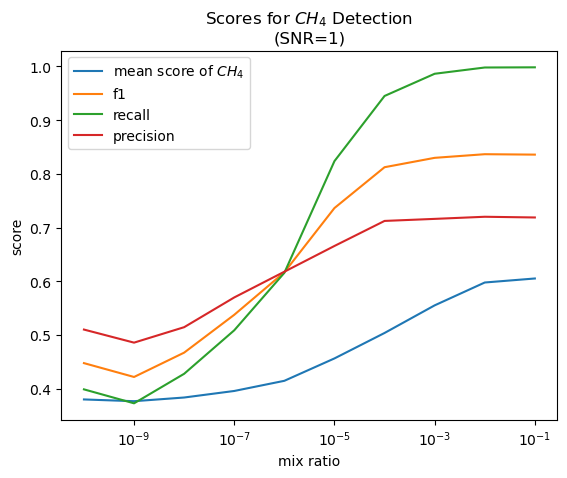

In [21]:
SNR_val_by_atmCH4=[[] for i in range(10)]

for i, j in enumerate(range(-10,-0)):
    SNR_val_by_atmCH4[i]=SNR_val_test[SNR_val_test["atm CH4"]==j]
    co2=int(len(SNR_val_test[SNR_val_test["label"]==0])/10)
    SNR_val_by_atmCH4[i]=pd.concat([SNR_val_by_atmCH4[i],
                                      SNR_val_test[SNR_val_test["label"]==0].sample(n=co2)])
    print(SNR_val_by_atmCH4[i]["label"].value_counts())
    
SNR_val_f1 = np.zeros(len(mix_ratios))
SNR_val_recall = np.zeros(len(mix_ratios))
SNR_val_precision = np.zeros(len(mix_ratios))
SNR_val_score = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                
                SNR_val_f1[j] = f1_score(
                    SNR_val_by_atmCH4[j]["label"].astype(int),
                    SNR_val_by_atmCH4[j]["pred"].astype(int)
                    )
                
                SNR_val_recall[j] = recall_score(
                    SNR_val_by_atmCH4[j]["label"].astype(int),
                    SNR_val_by_atmCH4[j]["pred"].astype(int)
                    )
                
                SNR_val_precision[j]=precision_score(
                    SNR_val_by_atmCH4[j]["label"].astype(int),
                    SNR_val_by_atmCH4[j]["pred"].astype(int)
                    )
                
                print(f"mix ratio:CH4={mix_ratios[j]}")
                print(confusion_matrix(SNR_val_by_atmCH4[j]["label"].astype(int),
                                    SNR_val_by_atmCH4[j]["pred"].astype(int)))
                
                ## mean of probabilities of label 1
                print(f"mean score of :CH4={mix_ratios[j ]} is {SNR_val_by_atmCH4[j][SNR_val_by_atmCH4[j]['label']==1]['score'].mean()}")
                SNR_val_score[j] = SNR_val_by_atmCH4[j][
                    SNR_val_by_atmCH4[j]['label']==1
                    ]['score'].mean()

## plot scores
plt.figure()
plt.plot(mix_ratios,SNR_val_score,label="mean score of $CH_4$")
plt.plot(mix_ratios,SNR_val_f1,label="f1")
plt.plot(mix_ratios,SNR_val_recall,label="recall")
plt.plot(mix_ratios,SNR_val_precision,label="precision")

plt.xlabel("mix ratio")
plt.xscale("log")
plt.ylabel("score")

plt.legend()
plt.title(f"Scores for $CH_4$ Detection\n(SNR={SNR})")